## Контест 1

Выполнил: Шамбилов Руслан

1. Загрузим библиотеки

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

2. Загрузим датасеты, сразу очистим их от дубликатов и пустых значений, также, чтобы избежать категориальных признаков, исключим их

In [17]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train.dropna().drop_duplicates().select_dtypes(include=[np.number])
df_test = df_test.dropna().drop_duplicates().select_dtypes(include=[np.number])

3. Построим матрицу корреляции, чтобы узнать, какой признак коррелирует с RiskScore и выведем ее

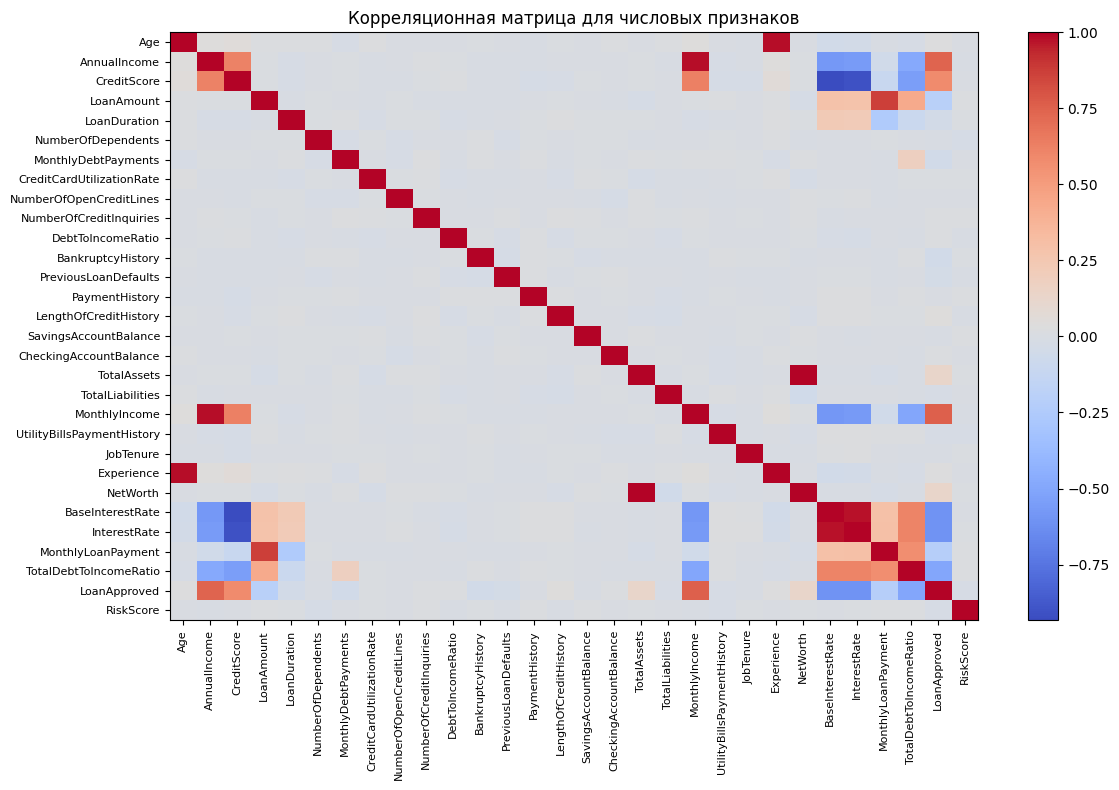

In [18]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=8, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=8)

plt.title('Корреляционная матрица для числовых признаков', fontsize=12)

plt.tight_layout()
plt.show()

4. Так как ни один признак сильно не влияет на RiskScore, приступим к отлову выбросов и визуализации распределения нашего признака

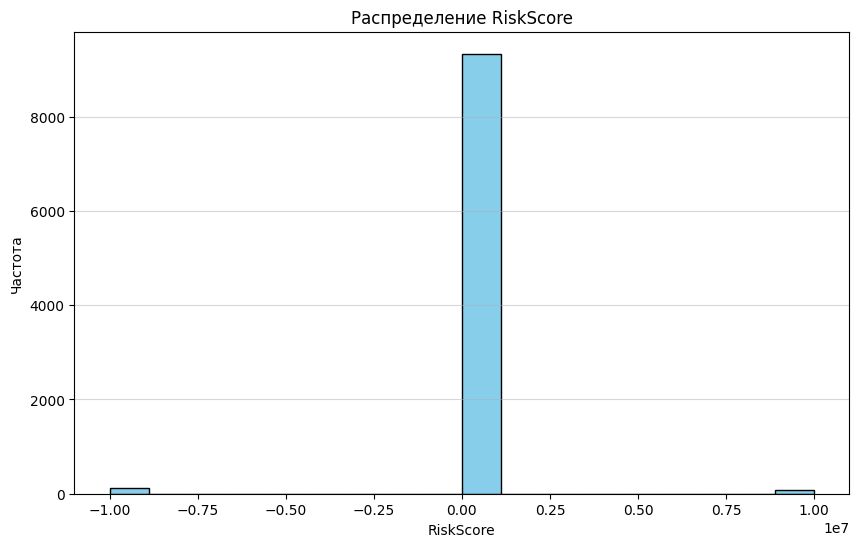

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['RiskScore'], bins=18, color='skyblue', edgecolor='black')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()

5. Уберем все выбросы, визуализируем уже без них (значения <0 и >100 являются выбросами)

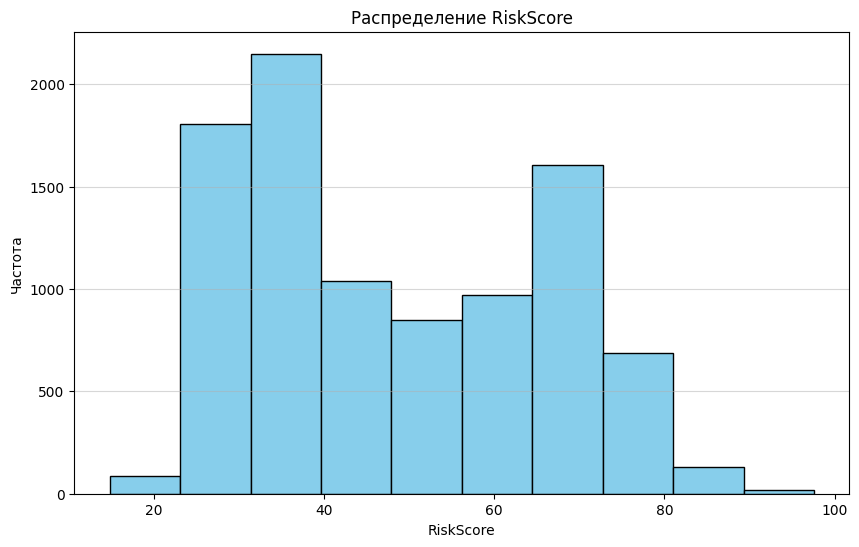

In [24]:
df_train = df_train[(df_train['RiskScore'] >= 0) & (df_train['RiskScore'] <= 100)]
plt.figure(figsize=(10, 6))
plt.hist(df_train['RiskScore'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()

6. Обучим модель линейной регрессии (применим гипер-параметр кросс-валидации для большего обучения)

In [25]:
x = df_train.loc[:, df_train.columns != 'RiskScore']
y = df_train['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) на тестовых данных: {mse}")
print(f"R-squared (R²) на тестовых данных: {r2}")

mse_scorer = make_scorer(mean_squared_error)
cv_scores = cross_val_score(model, x, y, cv=5, scoring=mse_scorer)

print("MSE для каждого фолда (кросс-валидация): ", cv_scores)
print(f"Средний MSE (кросс-валидация): {cv_scores.mean()}")


Mean Squared Error (MSE) на тестовых данных: 20.47541431610931
R-squared (R²) на тестовых данных: 0.9294707382835055
MSE для каждого фолда (кросс-валидация):  [20.23107649 19.38746412 19.94743637 20.33657991 20.61206998]
Средний MSE (кросс-валидация): 20.10292537456853


7. Опробуем модель на тестовом наборе данных, выведем итоговый .csv файл

In [26]:
x_test = df_test.drop(columns=['ID'])

y_test_pred = model.predict(x_test)

df_result = pd.DataFrame({
    'ID': df_test['ID'],  
    'RiskScore': y_test_pred  
})

df_result.to_csv('contest.csv', index=False)
